# importing library 

In [1]:
import numpy as np 
import pandas as pd 
import networkx as nx 
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline 
import matplotlib.pyplot as plt
import scipy


/kaggle/input/scheafer200-merged-labels/Schaefer200_merged_labels(Schaefer200_merged_labels).csv
/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx
/kaggle/input/widsdatathon2025/Data Dictionary.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx


# loading data

In [2]:
# loading test 
test_cat= pd.read_excel('/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx')
test_func= pd.read_csv('/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
test_quant = pd.read_excel('/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx')

#loading dictionary 
data_dic = pd.read_excel('/kaggle/input/widsdatathon2025/Data Dictionary.xlsx')

#loading train 
train_func = pd.read_csv('/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
train_cat = pd.read_excel('/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx')
train_quant = pd.read_excel('/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx')
train_solution = pd.read_excel('/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx')

# non fuctional data

In [3]:
train_func.shape

(1213, 19901)

In [4]:
train_N = train_func.shape[0]

In [5]:
print('the train number is ',train_cat.shape[0])
print('the test number is ',test_cat.shape[0])

the train number is  1213
the test number is  304


In [6]:
train_solution.shape

(1213, 3)

In [7]:
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [8]:
train_cat.isna().sum()

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64

In [9]:
train_cat.fillna({'PreInt_Demos_Fam_Child_Ethnicity': train_cat['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace=True)

In [10]:
train_cat.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,2017.652102,2.014839,0.424293,2.080791,2.288541,17.641385,24.892828,14.122012,24.719703
std,1.122522,1.135147,0.684343,3.164636,0.758348,4.004639,17.025899,7.201023,17.171113
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,0.000000,12.000000,5.000000
50%,2018.000000,1.000000,0.000000,0.000000,2.000000,18.000000,30.000000,18.000000,30.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [11]:
train_cat.dtypes

participant_id                       object
Basic_Demos_Enroll_Year               int64
Basic_Demos_Study_Site                int64
PreInt_Demos_Fam_Child_Ethnicity    float64
PreInt_Demos_Fam_Child_Race           int64
MRI_Track_Scan_Location               int64
Barratt_Barratt_P1_Edu                int64
Barratt_Barratt_P1_Occ                int64
Barratt_Barratt_P2_Edu                int64
Barratt_Barratt_P2_Occ                int64
dtype: object

In [12]:
train_quant.dtypes

participant_id                 object
EHQ_EHQ_Total                 float64
ColorVision_CV_Score            int64
APQ_P_APQ_P_CP                  int64
APQ_P_APQ_P_ID                  int64
APQ_P_APQ_P_INV                 int64
APQ_P_APQ_P_OPD                 int64
APQ_P_APQ_P_PM                  int64
APQ_P_APQ_P_PP                  int64
SDQ_SDQ_Conduct_Problems        int64
SDQ_SDQ_Difficulties_Total      int64
SDQ_SDQ_Emotional_Problems      int64
SDQ_SDQ_Externalizing           int64
SDQ_SDQ_Generating_Impact       int64
SDQ_SDQ_Hyperactivity           int64
SDQ_SDQ_Internalizing           int64
SDQ_SDQ_Peer_Problems           int64
SDQ_SDQ_Prosocial               int64
MRI_Track_Age_at_Scan         float64
dtype: object

In [13]:
train_quant.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [14]:
train_quant.isna().sum()

participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64

In [15]:
train_quant.fillna({'MRI_Track_Age_at_Scan':train_quant['MRI_Track_Age_at_Scan'].mean()},inplace=True)

In [16]:
train_solution.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [17]:
train_solution.isna().sum()

participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64

In [18]:
train_solution['ADHD_Outcome'].value_counts()

ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

In [19]:
train_solution['Sex_F'].value_counts()

Sex_F
0    797
1    416
Name: count, dtype: int64

In [20]:
'''''
# not usefull code 
# making adhd and sex masks
ADHD_id = train_solution[train_solution['ADHD_Outcome']==1]
nonADHD_id = train_solution[train_solution['ADHD_Outcome']==0]
female_id = train_solution[train_solution['Sex_F']==1]
male_id = female_id = train_solution[train_solution['Sex_F']==0]
'''''



"''\n# not usefull code \n# making adhd and sex masks\nADHD_id = train_solution[train_solution['ADHD_Outcome']==1]\nnonADHD_id = train_solution[train_solution['ADHD_Outcome']==0]\nfemale_id = train_solution[train_solution['Sex_F']==1]\nmale_id = female_id = train_solution[train_solution['Sex_F']==0]\n"

In [21]:
# Merge the dataframes
merged_train_quant = train_quant.merge(train_solution, on='participant_id', how='inner')




In [22]:
merged_train_quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan', 'ADHD_Outcome', 'Sex_F'],
      dtype='object')

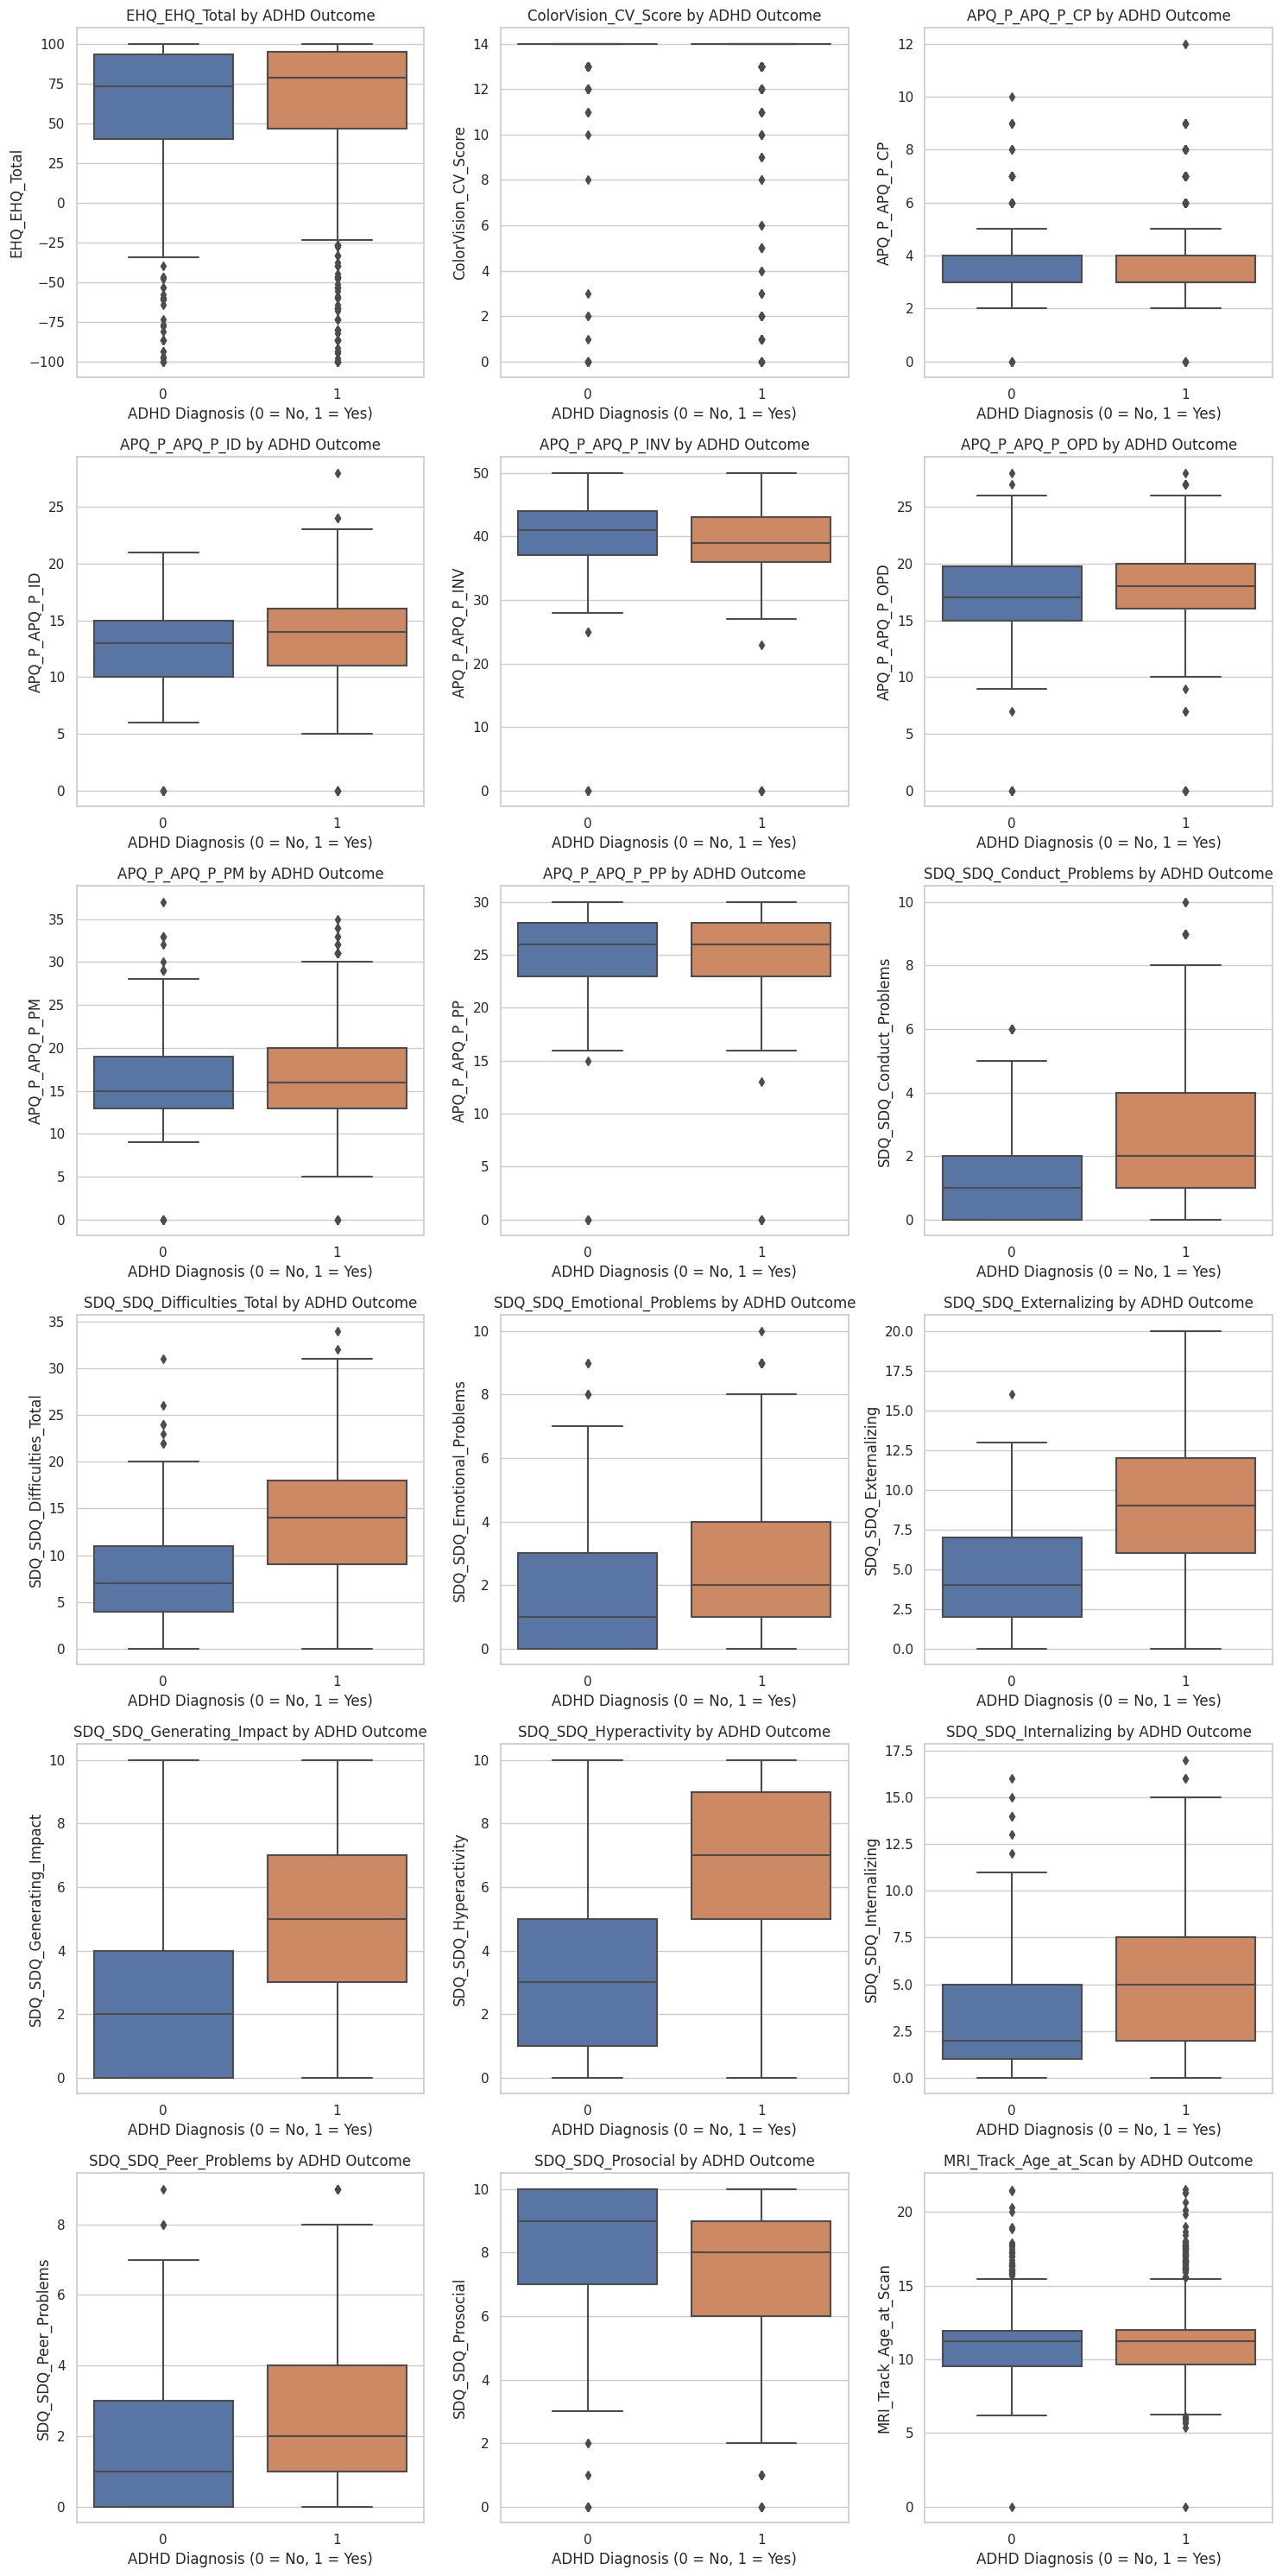

In [23]:

# List of variables to compare
variables_to_plot = [
    'EHQ_EHQ_Total', 
    'ColorVision_CV_Score',
    'APQ_P_APQ_P_CP', 
    'APQ_P_APQ_P_ID',
    'APQ_P_APQ_P_INV',
    'APQ_P_APQ_P_OPD',
    'APQ_P_APQ_P_PM',
    'APQ_P_APQ_P_PP',
    'SDQ_SDQ_Conduct_Problems',
    'SDQ_SDQ_Difficulties_Total',
    'SDQ_SDQ_Emotional_Problems',
    'SDQ_SDQ_Externalizing',
    'SDQ_SDQ_Generating_Impact', 
    'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Internalizing', 
    'SDQ_SDQ_Peer_Problems',
    'SDQ_SDQ_Prosocial',
    'MRI_Track_Age_at_Scan'
]

# Set up the grid of plots
num_vars = len(variables_to_plot)
cols = 3
rows = (num_vars + cols - 1) // cols

plt.figure(figsize=(5 * cols, 5 * rows))
sns.set(style="whitegrid")

for i, var in enumerate(variables_to_plot):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=merged_train_quant, x='ADHD_Outcome', y=var)
    plt.title(f'{var} by ADHD Outcome')
    plt.xlabel('ADHD Diagnosis (0 = No, 1 = Yes)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

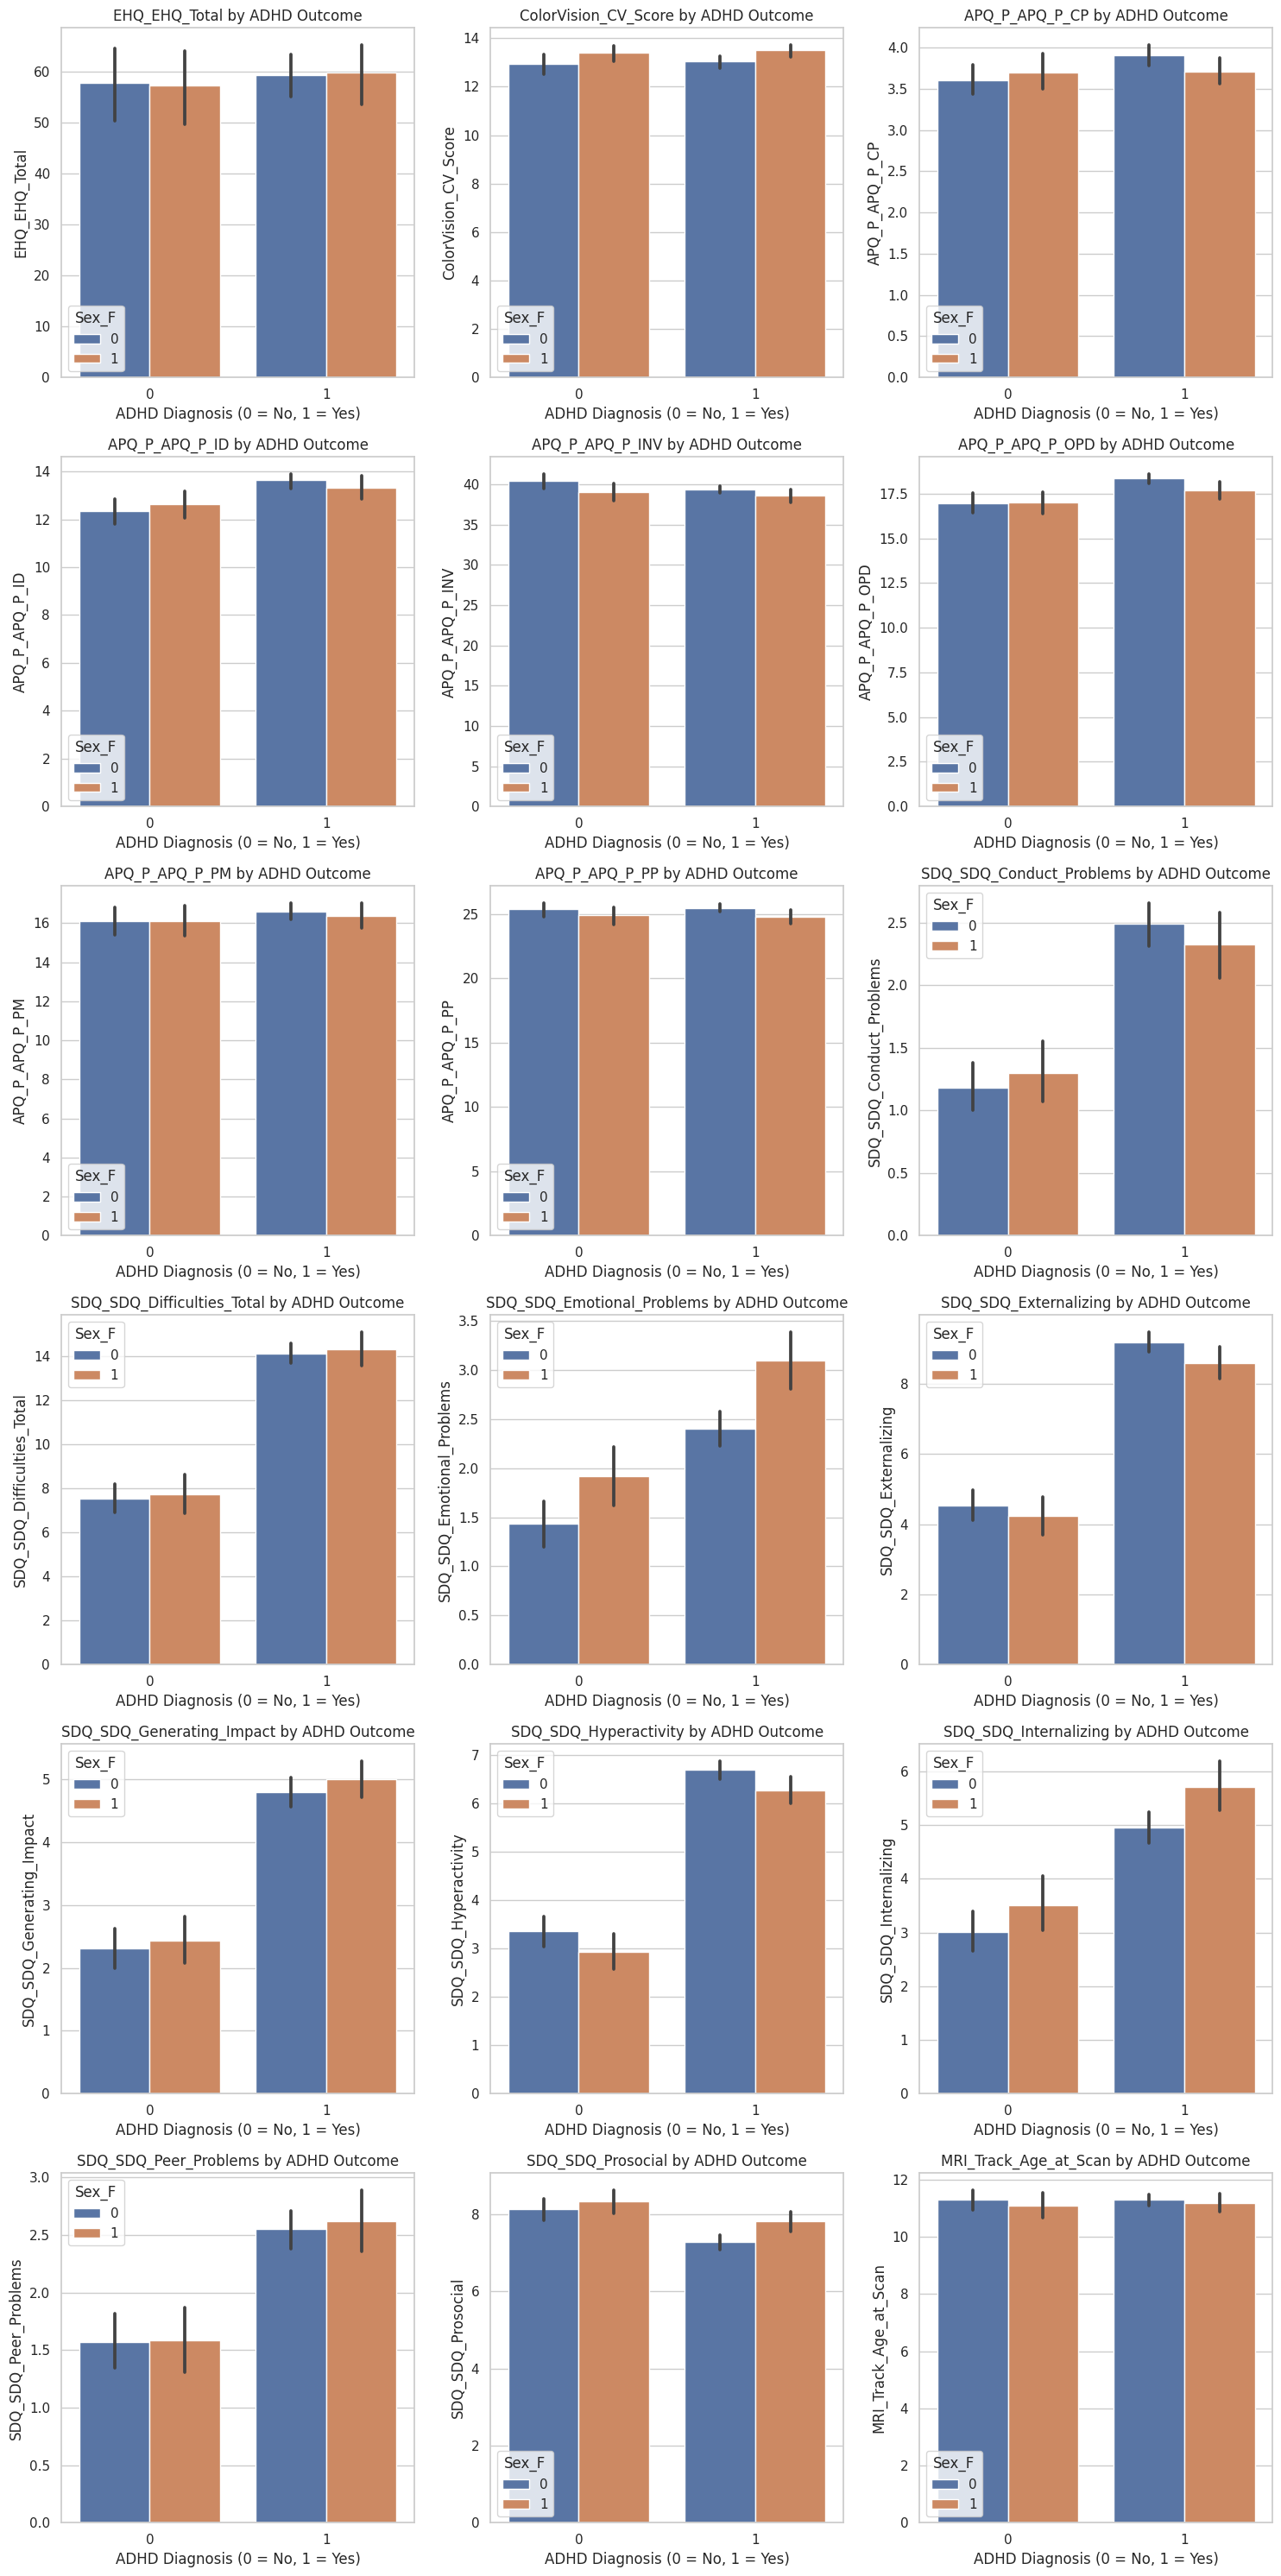

In [24]:

# List of variables to compare
variables_to_plot = [
    'EHQ_EHQ_Total', 
    'ColorVision_CV_Score',
    'APQ_P_APQ_P_CP', 
    'APQ_P_APQ_P_ID',
    'APQ_P_APQ_P_INV',
    'APQ_P_APQ_P_OPD',
    'APQ_P_APQ_P_PM',
    'APQ_P_APQ_P_PP',
    'SDQ_SDQ_Conduct_Problems',
    'SDQ_SDQ_Difficulties_Total',
    'SDQ_SDQ_Emotional_Problems',
    'SDQ_SDQ_Externalizing',
    'SDQ_SDQ_Generating_Impact', 
    'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Internalizing', 
    'SDQ_SDQ_Peer_Problems',
    'SDQ_SDQ_Prosocial',
    'MRI_Track_Age_at_Scan'
]

# Set up the grid of plots
num_vars = len(variables_to_plot)
cols = 3
rows = (num_vars + cols - 1) // cols

plt.figure(figsize=(5 * cols, 5 * rows))
sns.set(style="whitegrid")

for i, var in enumerate(variables_to_plot):
    plt.subplot(rows, cols, i + 1)
    sns.barplot(data=merged_train_quant, x='ADHD_Outcome', y=var, hue='Sex_F')
    plt.title(f'{var} by ADHD Outcome')
    plt.xlabel('ADHD Diagnosis (0 = No, 1 = Yes)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

the result of analysisng  quantetive data 

highly different : 
SDQ_SDQ_Externalizing*
SDQ_SDQ_Generating_Impact*
SDQ_SDQ_Hyperactivity*
SDQ_SDQ_Conduct_Problems*, 
SDQ_SDQ_Difficulties_Total*

different :
SDQ_SDQ_Internalizing+
SDQ_SDQ_Peer_Problems+
SDQ_SDQ_Emotional_Problems+

the only signifanct differnces between two sex is emotional problem 



In [25]:
merge_train_cat = train_cat.merge(train_solution, on='participant_id', how='inner')
merge_train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'ADHD_Outcome', 'Sex_F'],
      dtype='object')

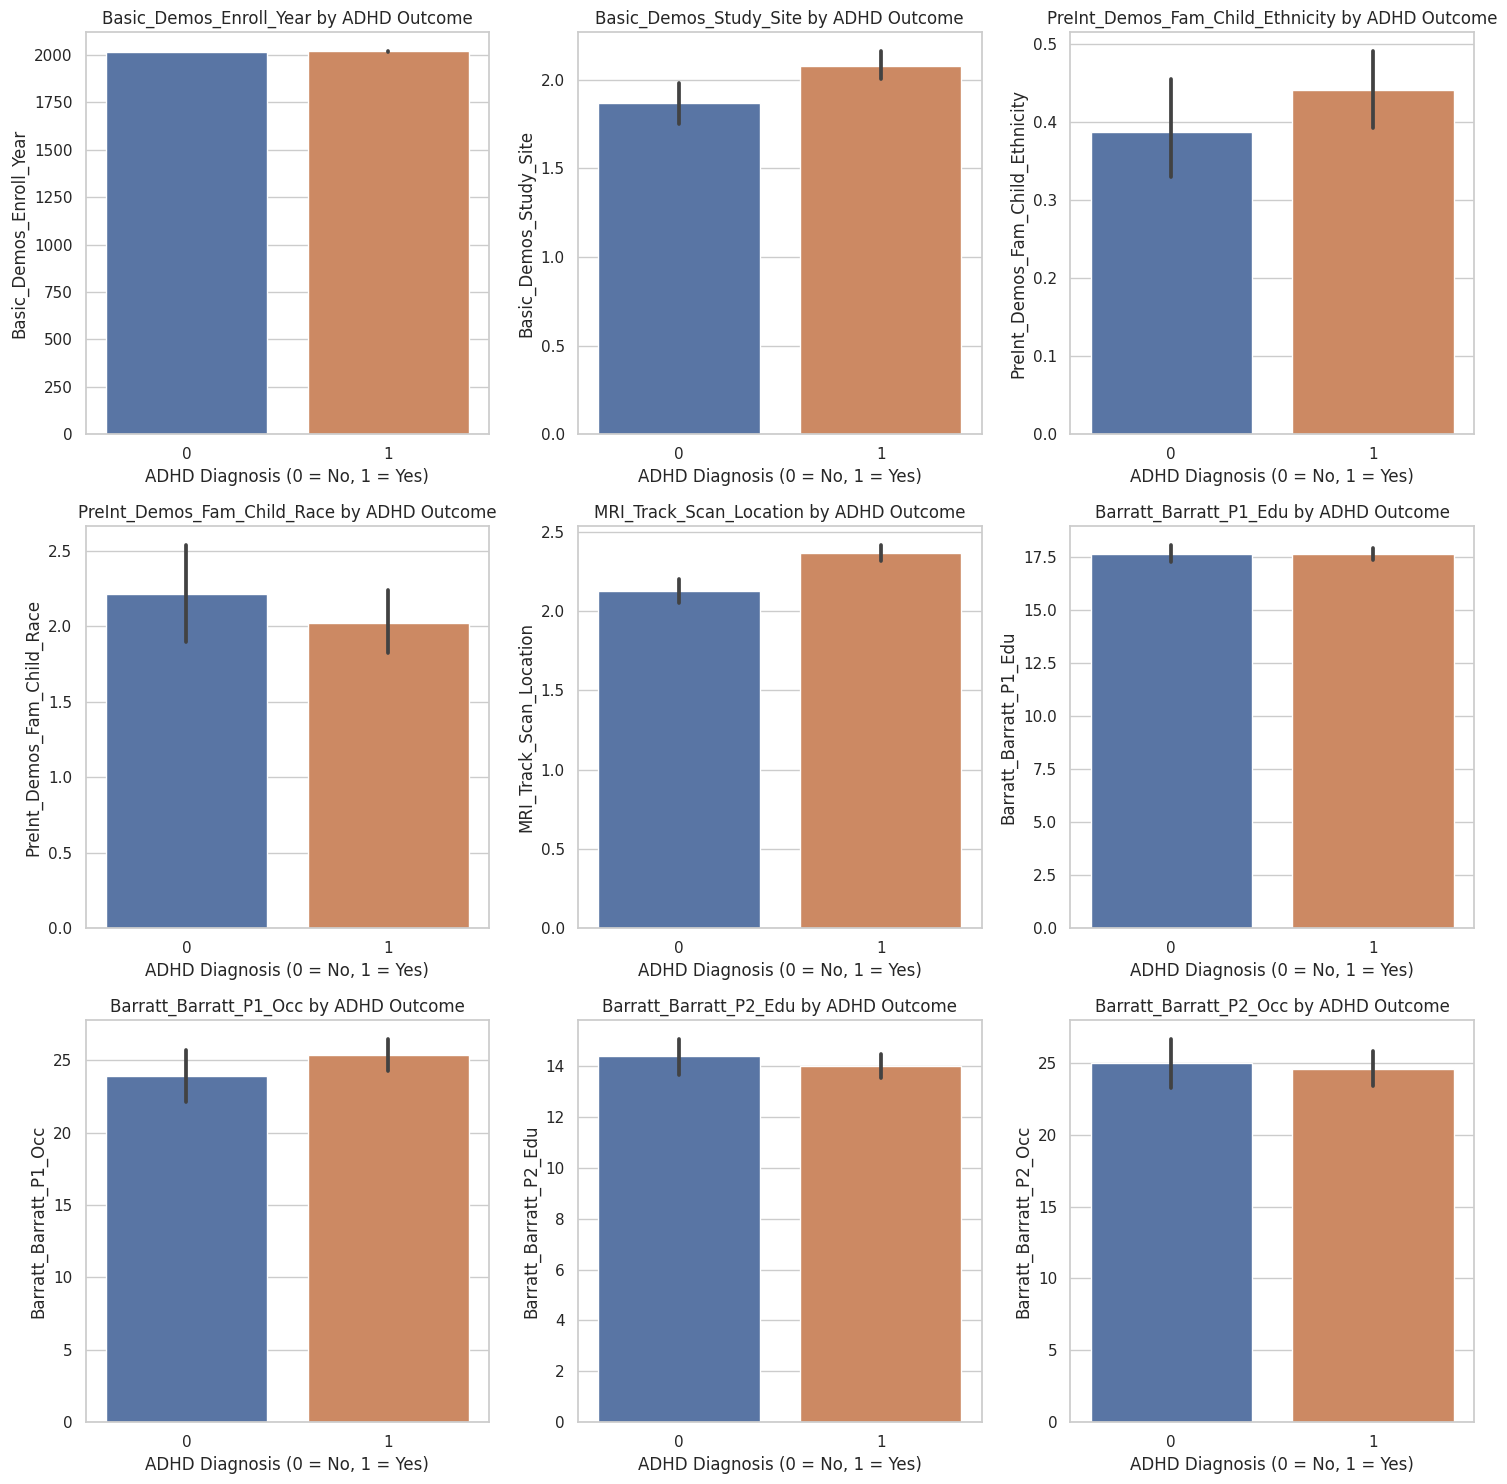

In [26]:

# List of variables to compare
variables_to_plot = [
    'Basic_Demos_Enroll_Year', 
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity',
    'PreInt_Demos_Fam_Child_Race',
    'MRI_Track_Scan_Location',
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]

# Set up the grid of plots
num_vars = len(variables_to_plot)
cols = 3
rows = (num_vars + cols - 1) // cols

plt.figure(figsize=(5 * cols, 5 * rows))
sns.set(style="whitegrid")

for i, var in enumerate(variables_to_plot):
    plt.subplot(rows, cols, i + 1)
    sns.barplot(data=merge_train_cat, x='ADHD_Outcome', y=var)
    plt.title(f'{var} by ADHD Outcome')
    plt.xlabel('ADHD Diagnosis (0 = No, 1 = Yes)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

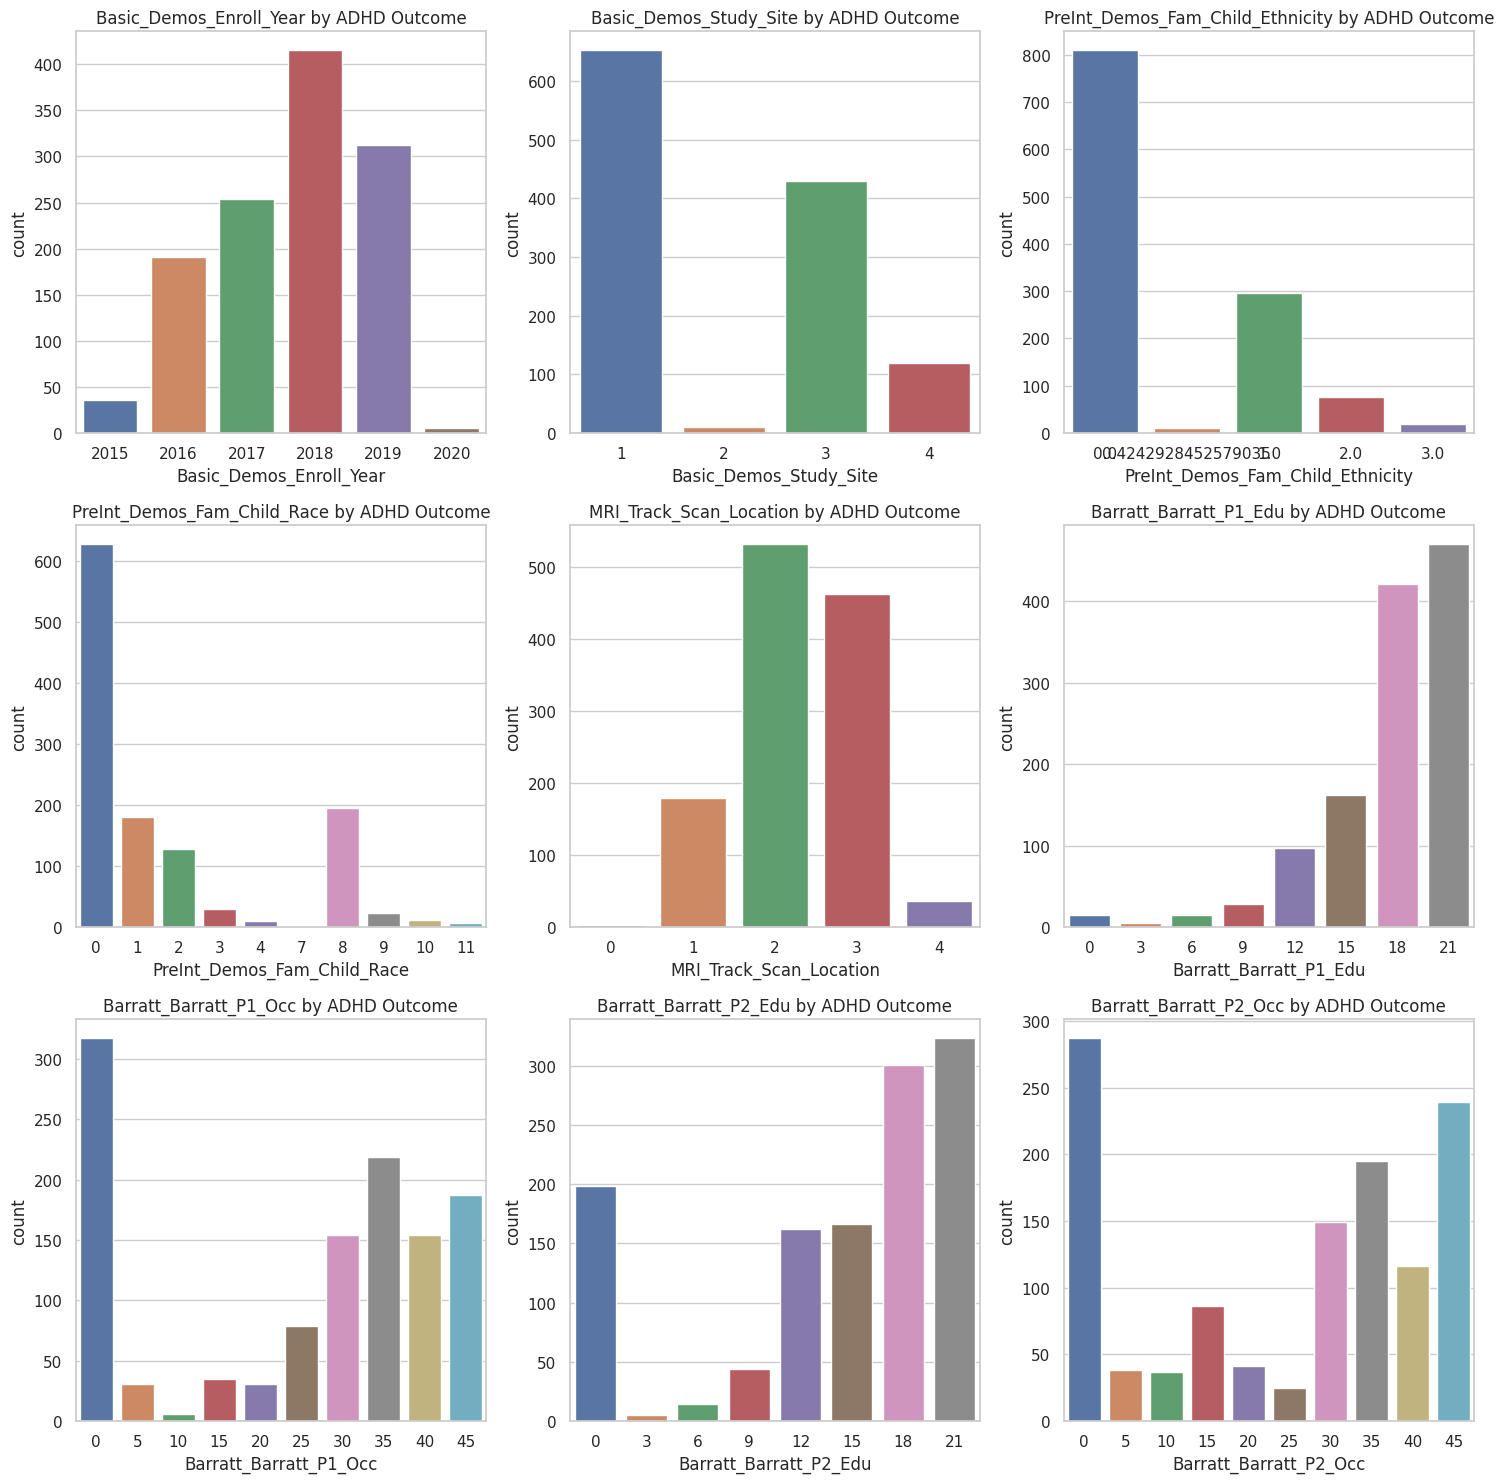

In [27]:
# List of variables to compare
variables_to_plot = [
    'Basic_Demos_Enroll_Year', 
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity',
    'PreInt_Demos_Fam_Child_Race',
    'MRI_Track_Scan_Location',
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]

# Set up the grid of plots
num_vars = len(variables_to_plot)
cols = 3
rows = (num_vars + cols - 1) // cols

plt.figure(figsize=(5 * cols, 5 * rows))
sns.set(style="whitegrid")

for i, var in enumerate(variables_to_plot):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(data=merge_train_cat, x=var)
    plt.title(f'{var} by ADHD Outcome')
    plt.xlabel(var)
    plt.ylabel('count')

plt.tight_layout()
plt.show()

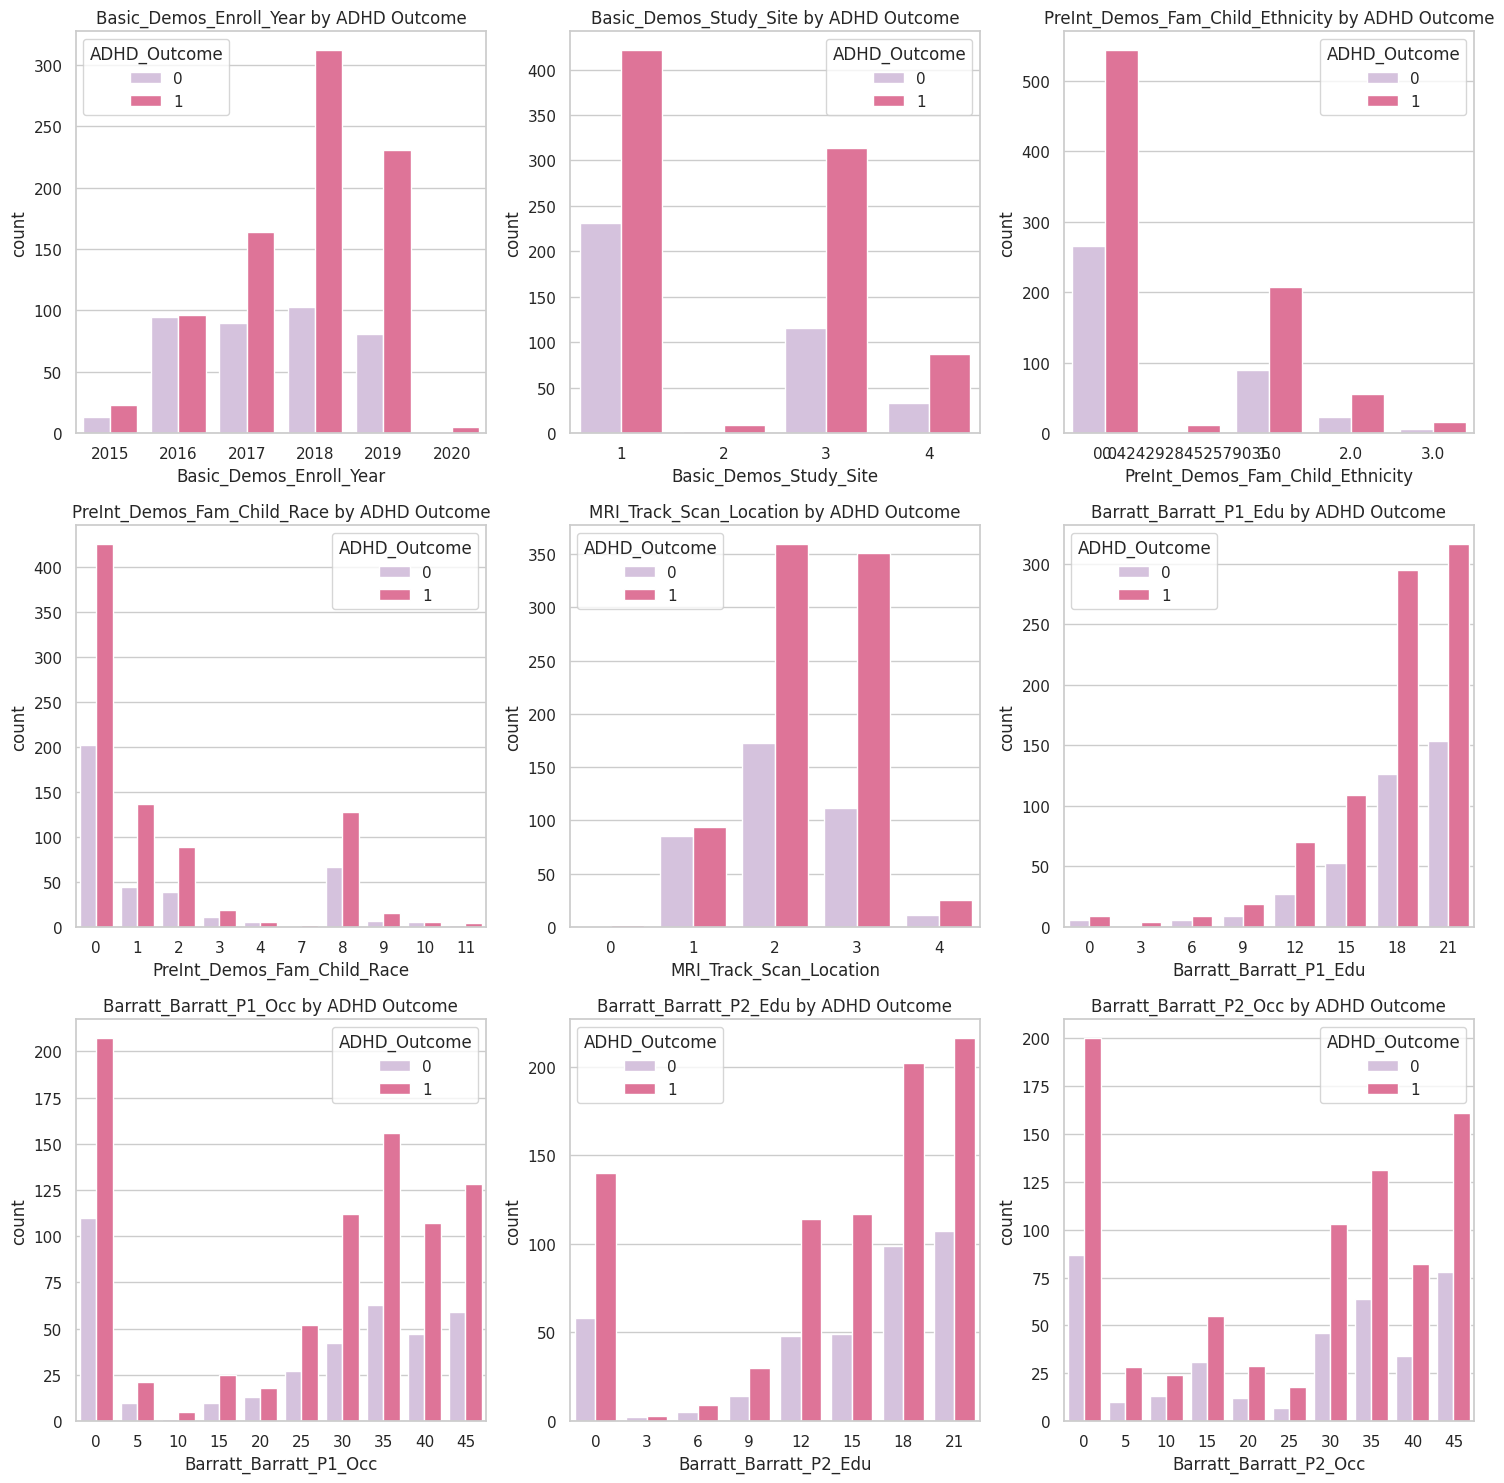

In [28]:
# List of variables to compare
variables_to_plot = [
    'Basic_Demos_Enroll_Year', 
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity',
    'PreInt_Demos_Fam_Child_Race',
    'MRI_Track_Scan_Location',
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]
colors = ['#d7bde2','#f06292' ]
# Set up the grid of plots
num_vars = len(variables_to_plot)
cols = 3
rows = (num_vars + cols - 1) // cols

plt.figure(figsize=(5 * cols, 5 * rows))
sns.set(style="whitegrid")

for i, var in enumerate(variables_to_plot):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(data=merge_train_cat, x=var, hue='ADHD_Outcome', palette = colors)
    plt.title(f'{var} by ADHD Outcome')
    plt.xlabel(var)
    plt.ylabel('count')

plt.tight_layout()
plt.show()

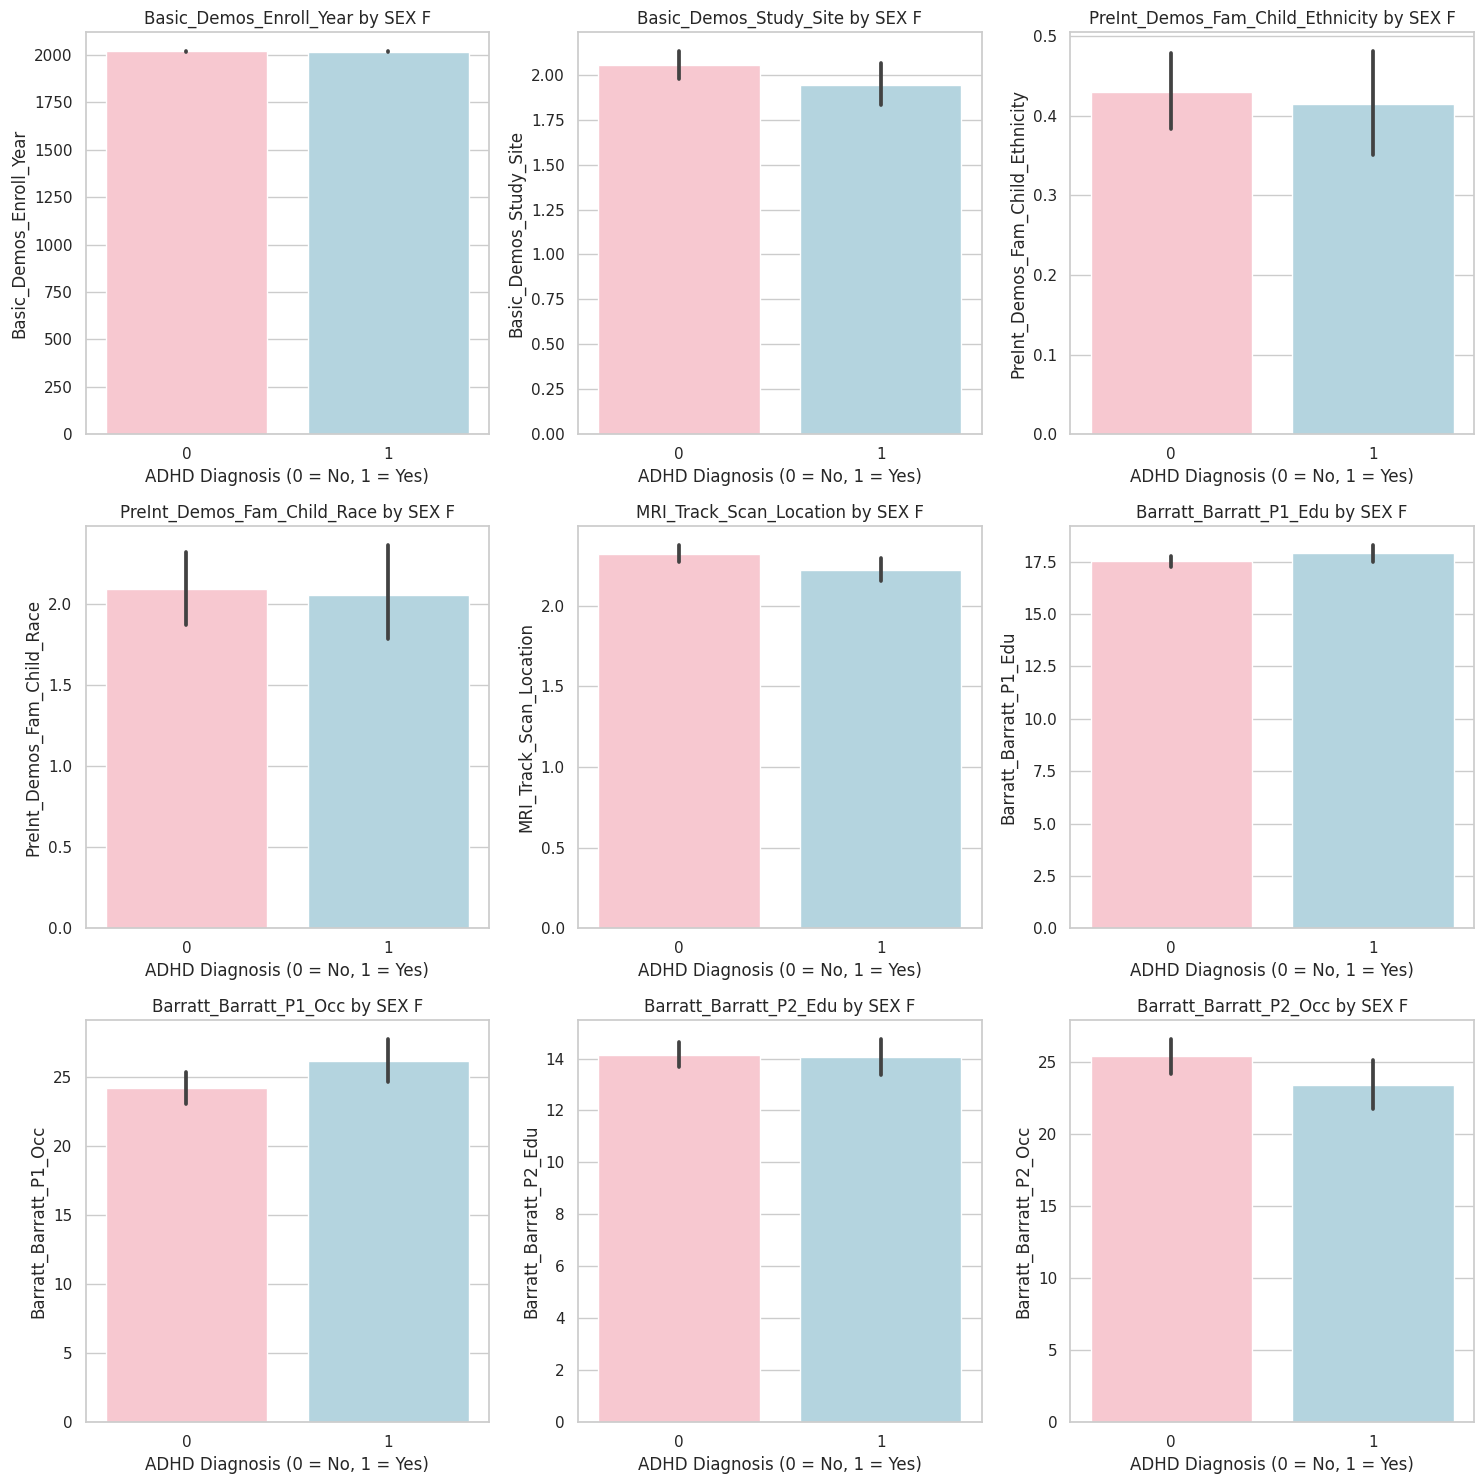

In [29]:

# List of variables to compare
variables_to_plot = [
    'Basic_Demos_Enroll_Year', 
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity',
    'PreInt_Demos_Fam_Child_Race',
    'MRI_Track_Scan_Location',
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]

# Set up the grid of plots
num_vars = len(variables_to_plot)
cols = 3
rows = (num_vars + cols - 1) // cols
custom_colors=['#FFC0CB','#ADD8E6']

plt.figure(figsize=(5 * cols, 5 * rows))
sns.set(style="whitegrid")

for i, var in enumerate(variables_to_plot):
    plt.subplot(rows, cols, i + 1)
    sns.barplot(data=merge_train_cat, x='Sex_F', y=var,  palette=custom_colors)
    plt.title(f'{var} by SEX F')
    plt.xlabel('ADHD Diagnosis (0 = No, 1 = Yes)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

categorical data features : 

adhd : 'Basic_Demos_Study_Site','PreInt_Demos_Fam_Child_Race','MRI_Track_Scan_Location', 'PreInt_Demos_Fam_Child_Ethnicity',''

sex : 'Barratt_Barratt_P1_Occ','Barratt_Barratt_P2_Occ'

## cleaning the test data

check if it is better to delete the missed data compare to replacing with mean

In [30]:
test_cat.dtypes

participant_id                       object
Basic_Demos_Enroll_Year               int64
Basic_Demos_Study_Site                int64
PreInt_Demos_Fam_Child_Ethnicity    float64
PreInt_Demos_Fam_Child_Race         float64
MRI_Track_Scan_Location               int64
Barratt_Barratt_P1_Edu              float64
Barratt_Barratt_P1_Occ              float64
Barratt_Barratt_P2_Edu              float64
Barratt_Barratt_P2_Occ              float64
dtype: object

In [31]:
test_quant.dtypes

participant_id                 object
EHQ_EHQ_Total                 float64
ColorVision_CV_Score          float64
APQ_P_APQ_P_CP                float64
APQ_P_APQ_P_ID                float64
APQ_P_APQ_P_INV               float64
APQ_P_APQ_P_OPD               float64
APQ_P_APQ_P_PM                float64
APQ_P_APQ_P_PP                float64
SDQ_SDQ_Conduct_Problems      float64
SDQ_SDQ_Difficulties_Total    float64
SDQ_SDQ_Emotional_Problems    float64
SDQ_SDQ_Externalizing         float64
SDQ_SDQ_Generating_Impact     float64
SDQ_SDQ_Hyperactivity         float64
SDQ_SDQ_Internalizing         float64
SDQ_SDQ_Peer_Problems         float64
SDQ_SDQ_Prosocial             float64
MRI_Track_Age_at_Scan         float64
dtype: object

In [32]:
test_cat.isna().sum()

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity     3
PreInt_Demos_Fam_Child_Race          6
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               1
Barratt_Barratt_P1_Occ               1
Barratt_Barratt_P2_Edu              36
Barratt_Barratt_P2_Occ              42
dtype: int64

In [33]:
for i in test_cat.columns:
    if test_cat[i].isna().sum() >0:
        test_cat.fillna({i: test_cat[i].mean()}, inplace=True)
print(test_cat.isna().sum())

participant_id                      0
Basic_Demos_Enroll_Year             0
Basic_Demos_Study_Site              0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
MRI_Track_Scan_Location             0
Barratt_Barratt_P1_Edu              0
Barratt_Barratt_P1_Occ              0
Barratt_Barratt_P2_Edu              0
Barratt_Barratt_P2_Occ              0
dtype: int64


In [34]:
test_quant.isna().sum()

participant_id                 0
EHQ_EHQ_Total                  1
ColorVision_CV_Score           9
APQ_P_APQ_P_CP                15
APQ_P_APQ_P_ID                15
APQ_P_APQ_P_INV               15
APQ_P_APQ_P_OPD               15
APQ_P_APQ_P_PM                15
APQ_P_APQ_P_PP                15
SDQ_SDQ_Conduct_Problems      30
SDQ_SDQ_Difficulties_Total    30
SDQ_SDQ_Emotional_Problems    30
SDQ_SDQ_Externalizing         30
SDQ_SDQ_Generating_Impact     30
SDQ_SDQ_Hyperactivity         30
SDQ_SDQ_Internalizing         30
SDQ_SDQ_Peer_Problems         30
SDQ_SDQ_Prosocial             30
MRI_Track_Age_at_Scan          0
dtype: int64

In [35]:
for i in test_quant.columns:
    if test_quant[i].isna().sum() >0:
        test_quant.fillna({i: test_quant[i].mean()}, inplace=True)
print(test_quant.isna().sum())

participant_id                0
EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
dtype: int64


## classification of non-functional data

In [36]:
train_nonfunc = train_quant.merge(train_cat,on ='participant_id', how='inner')
X_train_nonfunc = train_nonfunc.drop(columns = ['participant_id'])
y_train = train_solution.drop(columns = ['participant_id'])
y_trainADHD= y_train['ADHD_Outcome']
y_trainSex = y_train['Sex_F']

test_nonfunc = test_quant.merge(train_cat,on ='participant_id', how='inner')
X_test_nonfunc = test_nonfunc.drop(columns = ['participant_id'])


In [37]:
X_train_nonfunc.isna().sum().sum()

0

In [38]:
''''
befor runneing this code is better to normalize the data

# logestic regression for two model 
from sklearn.linear_model import LogisticRegression
logleg_ADHD = LogisticRegression(solver = 'saga',random_state=0, max_iter=10000).fit(X_train_nonfunc,y_trainADHD)
logleg_Sex = LogisticRegression(solver = 'saga',random_state=0, max_iter=10000).fit(X_train_nonfunc,y_trainSex

y_predictADHD = logleg_ADHD.predict_proba
y_predictSex = 
'''
                                            




"'\nbefor runneing this code is better to normalize the data\n\n# logestic regression for two model \nfrom sklearn.linear_model import LogisticRegression\nlogleg_ADHD = LogisticRegression(solver = 'saga',random_state=0, max_iter=10000).fit(X_train_nonfunc,y_trainADHD)\nlogleg_Sex = LogisticRegression(solver = 'saga',random_state=0, max_iter=10000).fit(X_train_nonfunc,y_trainSex\n\ny_predictADHD = logleg_ADHD.predict_proba\ny_predictSex = \n"

# working with functional data 

In [39]:
train_func.head(5)

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [40]:
train_func.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.060553,0.122315,0.060268,0.041287,0.069722,0.091007,0.066852,0.000252,0.014128,-0.002914,...,0.011075,-0.004938,-0.004378,0.001610,0.115171,0.049984,0.058144,0.093527,0.089403,0.128946
std,0.064178,0.054026,0.057495,0.043491,0.044222,0.049189,0.046864,0.049046,0.038205,0.042462,...,0.049632,0.046536,0.042900,0.047424,0.057128,0.051664,0.057674,0.054594,0.058036,0.058490
min,-0.183279,-0.059932,-0.145566,-0.127827,-0.072043,-0.079184,-0.105722,-0.164297,-0.137728,-0.148490,...,-0.161666,-0.176523,-0.178688,-0.138048,-0.070094,-0.153540,-0.131455,-0.085566,-0.204160,-0.083077
25%,0.018482,0.086102,0.026548,0.014457,0.042462,0.057614,0.036934,-0.031358,-0.010635,-0.030538,...,-0.021376,-0.033424,-0.033798,-0.030132,0.080291,0.015827,0.022316,0.059621,0.053224,0.090459
50%,0.058276,0.123220,0.061339,0.043246,0.067066,0.086494,0.067247,0.002549,0.016130,-0.002604,...,0.010254,-0.004683,-0.003724,0.000990,0.113640,0.052705,0.059151,0.093397,0.088612,0.127913
75%,0.100103,0.154518,0.099056,0.068408,0.096504,0.119404,0.095117,0.031053,0.038770,0.024507,...,0.044165,0.024913,0.024007,0.032268,0.150524,0.082526,0.095192,0.127144,0.127613,0.166523
max,0.321522,0.390895,0.278429,0.189825,0.317500,0.316811,0.270018,0.168196,0.145364,0.128301,...,0.194616,0.183152,0.180562,0.192015,0.375635,0.228748,0.322084,0.348153,0.267162,0.414304


In [41]:
train_func.isna().sum()

participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64

In [42]:
atlas = pd.read_csv('/kaggle/input/scheafer200-merged-labels/Schaefer200_merged_labels(Schaefer200_merged_labels).csv')

In [43]:
train_FCN= train_func.drop(columns='participant_id')

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


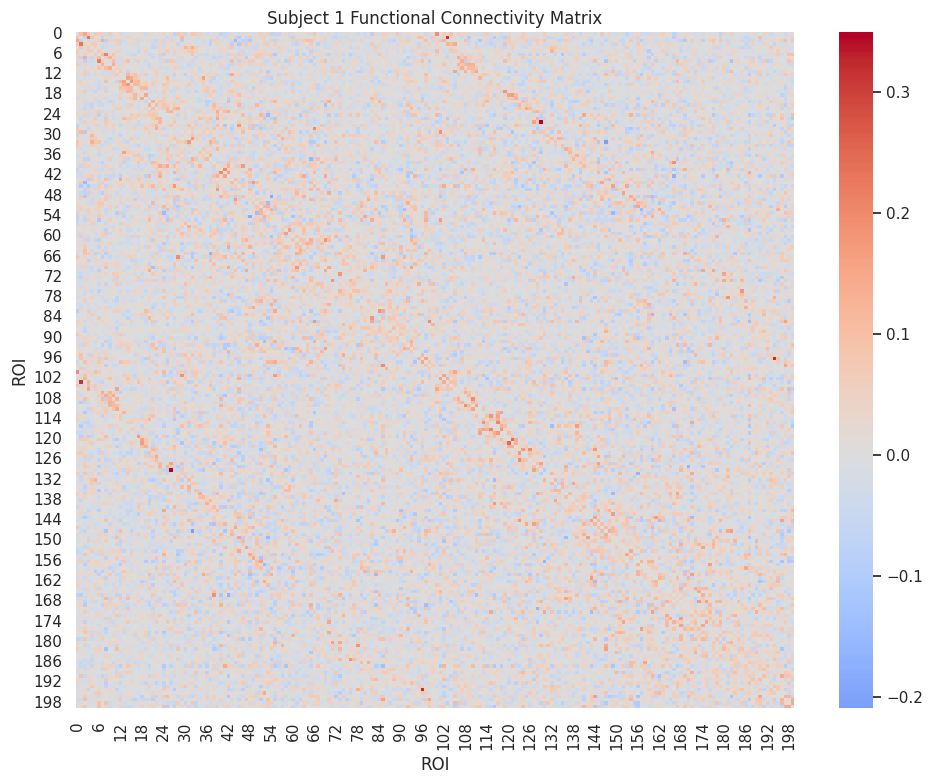

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


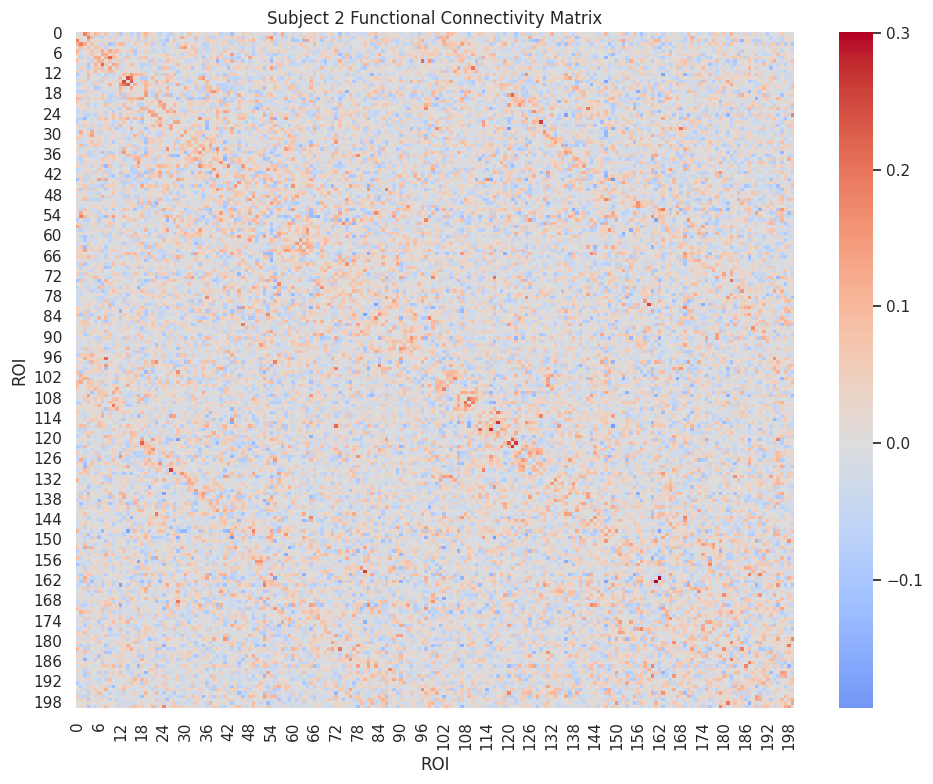

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


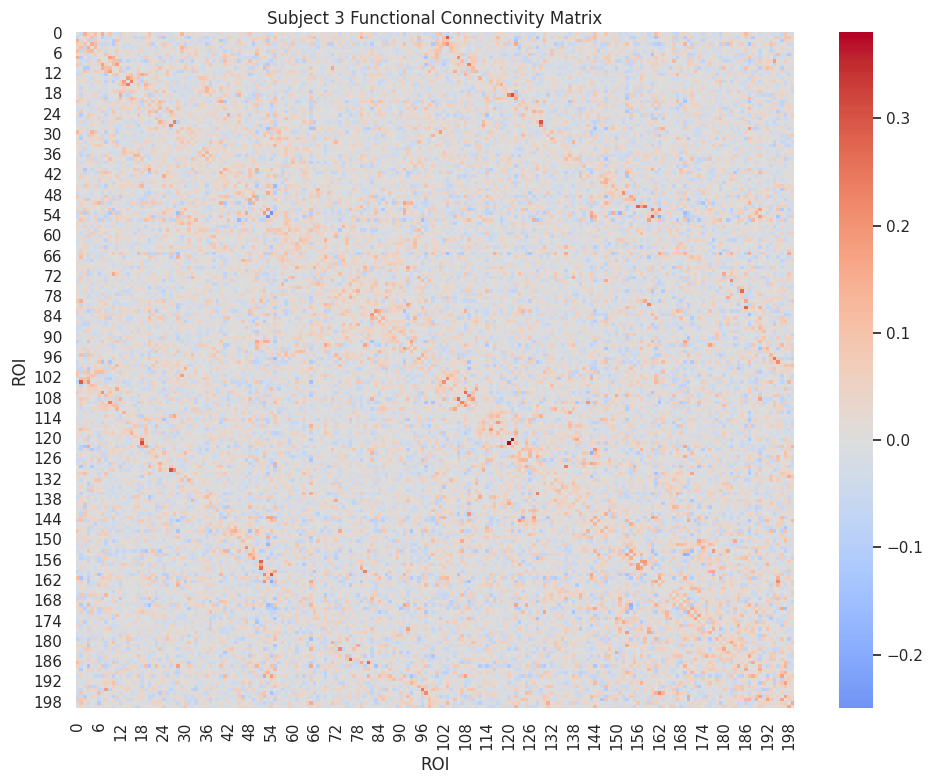

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


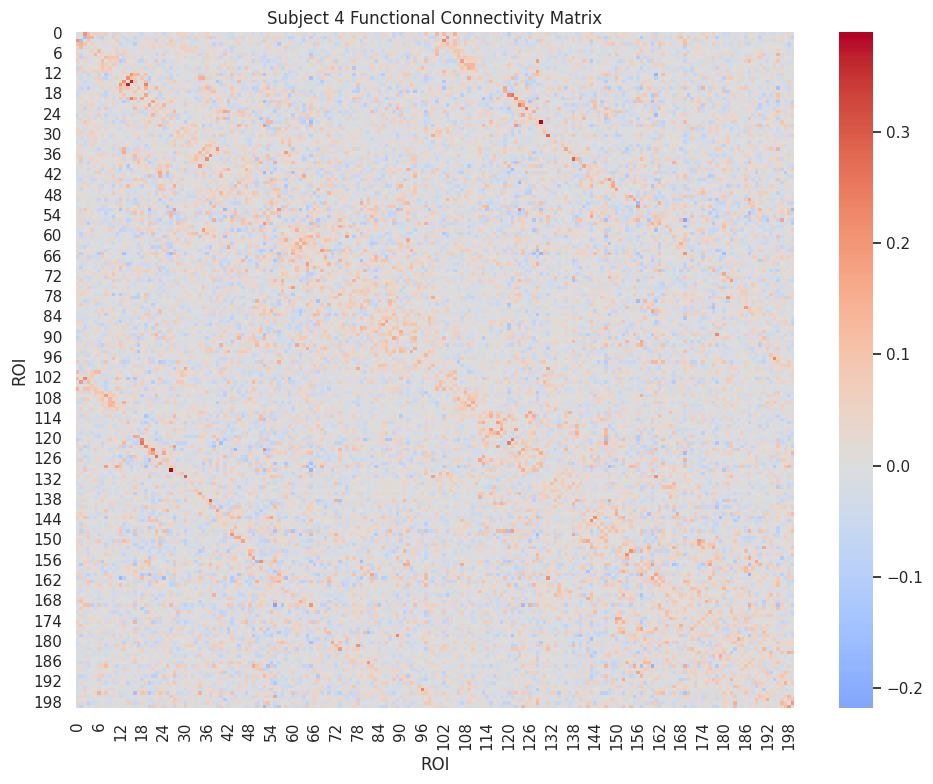

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


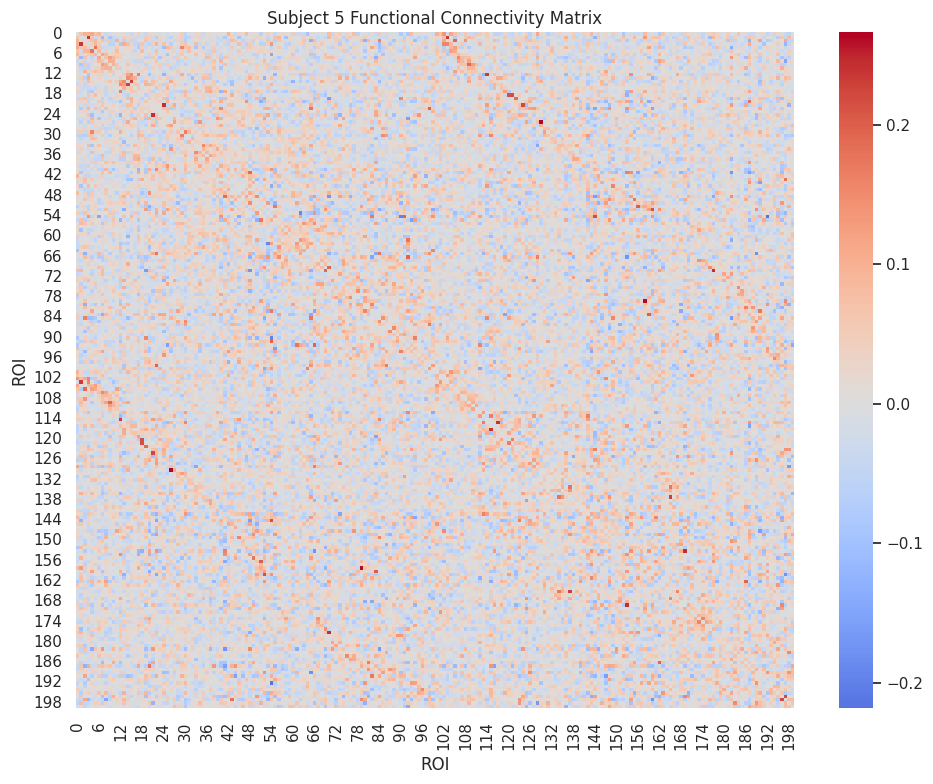

In [44]:
# visualizing heatmap for 5 single subject
from scipy.spatial.distance import squareform



# Loop through first 5 subjects
for i in range(5):
    subject_vector = np.asarray(train_FCN.iloc[i].values)
    fc_matrix = squareform(subject_vector)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(fc_matrix, cmap='coolwarm', center=0, cbar=True)
    plt.title(f"Subject {i+1} Functional Connectivity Matrix")
    plt.xlabel("ROI")
    plt.ylabel("ROI")
    plt.tight_layout()
    plt.show()

In [45]:

subject_vector = np.asarray(train_FCN.iloc[i].values)
fc_matrix1 = squareform(subject_vector)
print(fc_matrix1)


[[ 0.          0.06577056  0.09871365 ... -0.03732984 -0.05016336
  -0.00595109]
 [ 0.06577056  0.          0.01056387 ... -0.04579335  0.08274275
  -0.01015741]
 [ 0.09871365  0.01056387  0.         ...  0.11448359 -0.04679128
  -0.04869535]
 ...
 [-0.03732984 -0.04579335  0.11448359 ...  0.          0.08381976
   0.0795825 ]
 [-0.05016336  0.08274275 -0.04679128 ...  0.08381976  0.
   0.06726915]
 [-0.00595109 -0.01015741 -0.04869535 ...  0.0795825   0.06726915
   0.        ]]


## brain network analysis


they used sheafer 200 atlas 

In [46]:
atlas = pd.read_csv('/kaggle/input/scheafer200-merged-labels/Schaefer200_merged_labels(Schaefer200_merged_labels).csv')

In [47]:
atlas.head()

,ROI Label,ROI Name,R,A,S,Label Name,Network Name,Full Component Name
0,1,17Networks_LH_VisCent_ExStr_1,-26,-78,-14,17Networks_LH_VisCent_ExStr,central visual,extrastriate cortex
1,2,17Networks_LH_VisCent_ExStr_2,-26,-96,-12,17Networks_LH_VisCent_ExStr,central visual,extrastriate cortex
2,3,17Networks_LH_VisCent_Striate_1,-6,-92,-4,17Networks_LH_VisCent_Striate,central visual,striate cortex
3,4,17Networks_LH_VisCent_ExStr_3,-22,-96,6,17Networks_LH_VisCent_ExStr,central visual,extrastriate cortex
4,5,17Networks_LH_VisCent_ExStr_4,-40,-84,10,17Networks_LH_VisCent_ExStr,central visual,extrastriate cortex


In [48]:
atlas['Network Name'].value_counts() # i willcategorize my area based on this classification

Network Name
somatomotor A                     19
default B                         17
control A                         16
salience / ventral attention A    16
somatomotor B                     15
control B                         15
default A                         14
dorsal attention A                12
central visual                    11
peripheral visual                 11
salience / ventral attention B    10
dorsal attention B                10
limbic A                           8
limbic B                           6
control C                          6
default C                          6
temporal parietal                  6
central visual                     1
peripheral visual                  1
Name: count, dtype: int64

In [49]:
network_name = list(set(atlas['Network Name']))
network_name

['dorsal attention B',
 'somatomotor B',
 'central visual',
 'dorsal attention A',
 'control C',
 'salience / ventral attention B',
 'temporal parietal',
 'default C',
 'limbic A',
 'peripheral visual ',
 'limbic B',
 'control A',
 'peripheral visual',
 'default A',
 'control B',
 'default B',
 'salience / ventral attention A',
 'somatomotor A',
 'central visual  ']

In [50]:
atlas['Label Name'].value_counts()

Label Name
17Networks_RH_SomMotA                11
17Networks_LH_SomMotA                 8
17Networks_LH_VisCent_ExStr           5
17Networks_RH_VisCent_ExStr           5
17Networks_RH_TempPar                 4
                                     ..
17Networks_RH_SalVentAttnA_PrC        1
17Networks_RH_SalVentAttnA_FrOper     1
17Networks_LH_SalVentAttnB_PFCmp      1
17Networks_LH_SalVentAttnB_Ins        1
17Networks_RH_SalVentAttnB_IPL        1
Name: count, Length: 99, dtype: int64

In [51]:
network_to_nodes = {}
for i in network_name: 
    network_to_nodes[i]=atlas[atlas['Network Name']== i]['ROI Label'].to_list()
print(network_to_nodes)

{'dorsal attention B': [35, 36, 37, 38, 39, 137, 138, 139, 140, 141], 'somatomotor B': [21, 22, 23, 24, 25, 26, 27, 28, 124, 125, 126, 127, 128, 129, 130], 'central visual': [1, 2, 4, 5, 6, 101, 102, 103, 104, 105, 106], 'dorsal attention A': [29, 30, 31, 32, 33, 34, 131, 132, 133, 134, 135, 136], 'control C': [72, 73, 74, 181, 182, 183], 'salience / ventral attention B': [47, 48, 49, 50, 151, 152, 153, 154, 155, 156], 'temporal parietal': [99, 100, 197, 198, 199, 200], 'default C': [96, 97, 98, 194, 195, 196], 'limbic A': [53, 54, 55, 56, 161, 162, 163, 164], 'peripheral visual ': [10], 'limbic B': [51, 52, 157, 158, 159, 160], 'control A': [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 165, 166, 167, 168, 169, 170], 'peripheral visual': [7, 8, 9, 11, 12, 107, 108, 109, 110, 111, 112], 'default A': [75, 76, 77, 78, 79, 80, 81, 82, 184, 185, 186, 187, 188, 189], 'control B': [67, 68, 69, 70, 71, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180], 'default B': [83, 84, 85, 86, 87, 88, 89, 90, 

In [52]:
n_nodes= 200
n_edges= (n_nodes**2-n_nodes)/2

In [53]:
from scipy.spatial.distance import squareform

network_metrics = []

threshold = 0.3  # or set as you want

for i in range(len(train_FCN)):
    fc_vector = train_FCN.iloc[i].values
    fc_matrix = squareform(fc_vector)
    
    # Threshold the matrix
    adj_matrix = (np.abs(fc_matrix) > threshold) * fc_matrix
    
    # Build the graph
    G = nx.from_numpy_array(adj_matrix)

    # Compute features
    density = nx.density(G)
    avg_clustering = nx.average_clustering(G)
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()

    # Degree and Strength
    degrees = dict(G.degree(weight=None))
    avg_degree = np.mean(list(degrees.values()))
    
    strengths = dict(G.degree(weight='weight'))
    avg_strength = np.mean(list(strengths.values()))
    
    # Global efficiency
    try:
        efficiency = nx.global_efficiency(G)
    except:
        efficiency = np.nan  # If graph is disconnected badly

    # Largest connected component size
    largest_cc = len(max(nx.connected_components(G), key=len))

    # Try modularity (if there are communities)
    try:
        from networkx.algorithms.community import greedy_modularity_communities
        communities = list(greedy_modularity_communities(G))
        modularity = nx.algorithms.community.quality.modularity(G, communities)
    except:
        modularity = 0

    metrics = {
        'participant_id': train_func['participant_id'].iloc[i],
        'density': density,
        'avg_clustering': avg_clustering,
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'avg_degree': avg_degree,
        'avg_strength': avg_strength,
        'global_efficiency': efficiency,
        'largest_cc_size': largest_cc,
        'modularity': modularity
    }
    network_metrics.append(metrics)

# Save all to DataFrame
metrics_df = pd.DataFrame(network_metrics)

In [54]:
metrics_df.head()

,participant_id,density,avg_clustering,num_nodes,num_edges,avg_degree,avg_strength,global_efficiency,largest_cc_size,modularity
0,70z8Q2xdTXM3,0.000151,0.0,200,3,0.03,0.009837,0.000151,2,0.665926
1,WHWymJu6zNZi,0.000050,0.0,200,1,0.01,0.003005,0.000050,2,0.000000
2,4PAQp1M6EyAo,0.000151,0.0,200,3,0.03,0.009938,0.000176,3,0.424528
3,obEacy4Of68I,0.000101,0.0,200,2,0.02,0.007540,0.000101,2,0.499465
4,s7WzzDcmDOhF,0.000000,0.0,200,0,0.00,0.000000,0.000000,1,0.000000


In [55]:
'''
sns.pairplot(metrics_df.drop(columns=['participant_id']))
plt.suptitle('Network Features Relationships', y=1.02)
plt.show()
'''

"\nsns.pairplot(metrics_df.drop(columns=['participant_id']))\nplt.suptitle('Network Features Relationships', y=1.02)\nplt.show()\n"

In [56]:
X_train = train_quant.merge(train_cat, on= 'participant_id', how= 'inner')
X_train = X_train.merge(train_func, on ='participant_id', how = 'inner')
X_train = X_train.merge(train_func, on ='participant_id', how = 'inner')
X_train = X_train.merge(metrics_df, on ='participant_id', how = 'inner')
X_train = X_train.drop(columns = 'participant_id')
y_train = train_solution.drop(columns = ['participant_id'])

# spiliting the data 
from sklearn.model_selection import train_test_split
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X_train, y_train, test_size= 0.2, random_state = 4)

## PCA

# machine learning models

In [57]:
# XGboost 
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    n_estimators=500,
    learning_rate=0.03,  # slower learning = better generalization
    max_depth=6,         # deeper trees (but not too deep)
    subsample=0.7,       # random sampling of data
    colsample_bytree=0.7,
    gamma=1,             # force better splits
    scale_pos_weight=8,  # adjust based on class imbalance ratio
    reg_alpha=0.1,       # L1 regularization
    reg_lambda=2         # L2 regularization
)
multioutput_classifier = MultiOutputClassifier(xgb_classifier)


multioutput_classifier.fit(X_trainT, y_trainT)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=1,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.03, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=500, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [58]:
from sklearn.metrics import accuracy_score

y_pred = multioutput_classifier.predict(X_testT)
print("Accuracy:", accuracy_score(y_testT, y_pred))

Accuracy: 0.5102880658436214


In [59]:

import lightgbm as lgb

lgbm_classifier = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=500,
    learning_rate=0.02,
    num_leaves=31,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    reg_alpha=0.2,
    reg_lambda=1.5
)

multioutput_classifier = MultiOutputClassifier(lgbm_classifier)
multioutput_classifier.fit(X_trainT, y_trainT)

from sklearn.metrics import accuracy_score

y_pred = multioutput_classifier.predict(X_testT)
print("Accuracy:", accuracy_score(y_testT, y_pred))


[LightGBM] [Info] Number of positive: 661, number of negative: 309
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.853125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10150198
[LightGBM] [Info] Number of data points in the train set: 970, number of used features: 39834
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain